In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import tensorflow.keras as k

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#adding some noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

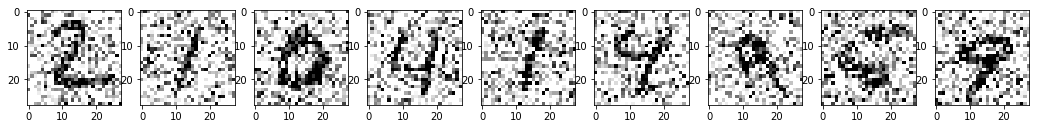

In [9]:
#isplaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [21]:
model = k.models.Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
          
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(1,(3,3), activation='sigmoid', padding='same'))

In [26]:
model.compile(optimizer='adadelta',
             loss='binary_crossentropy')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        18464     
__________

In [27]:
model.fit(x_train_noisy, x_train,
        epochs=10,
        shuffle=True,
        validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 40s 672us/sample - loss: 3.7840 - val_loss: 3.1602
Epoch 2/10
60000/60000 [==============================] - 41s 690us/sample - loss: 3.1541 - val_loss: 3.0501
Epoch 3/10
60000/60000 [==============================] - 44s 728us/sample - loss: 3.0773 - val_loss: 3.0158
Epoch 4/10
60000/60000 [==============================] - 43s 720us/sample - loss: 3.0391 - val_loss: 2.9902
Epoch 5/10
60000/60000 [==============================] - 44s 733us/sample - loss: 3.0171 - val_loss: 2.9954
Epoch 6/10
60000/60000 [==============================] - 44s 726us/sample - loss: 2.9998 - val_loss: 2.9915
Epoch 7/10
60000/60000 [==============================] - 42s 706us/sample - loss: 2.9888 - val_loss: 2.9687
Epoch 8/10
60000/60000 [==============================] - 43s 721us/sample - loss: 2.9801 - val_loss: 2.9670
Epoch 9/10
60000/60000 [==============================] - 46s 764us/sample - l

In [28]:
model.evaluate(x_test_noisy, x_test)

10000/10000 [==============================] - 2s 232us/sample - loss: 2.9662


2.966172122955322

In [29]:
model.save('denoising_autoencoder.model')

In [31]:
no_noise_img = model.predict(x_test_noisy)

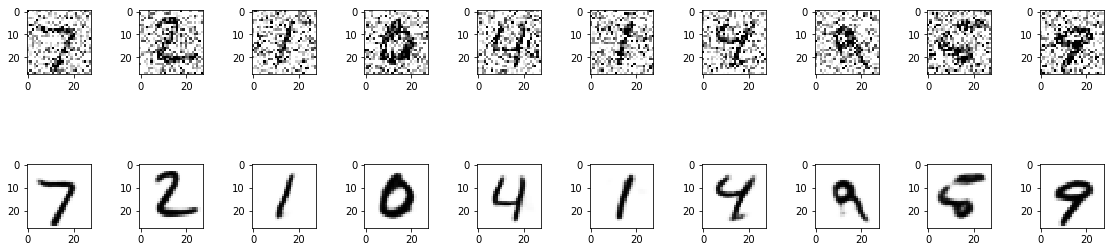

In [34]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()